In [768]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as linear_model

In [769]:
data = pd.read_csv("data.csv")

mechanical = data[data.Title.isin(["Mechanical Engineer"])]
electronic = data[data.Title.isin(["Electronic Engineer"])]

columns = ["Experience"]

salary_mechanical = np.array(mechanical["Salary"])/1e6
experience_mechanical = np.array(mechanical[columns])/12

salary_electronic = np.array(electronic["Salary"])/1e6
experience_electronic = np.array(electronic[columns])/12

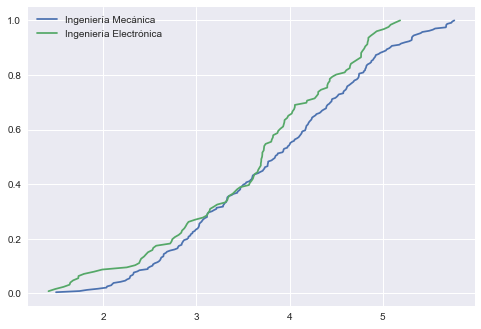

In [782]:
_ = plt.plot(np.sort(salary_mechanical), np.linspace(1/len(salary_mechanical), 1, len(salary_mechanical)), label = "Ingeniería Mecánica")
_ = plt.plot(np.sort(salary_electronic), np.linspace(1/len(salary_electronic), 1, len(salary_electronic)), label = "Ingeniería Electrónica")
_ = plt.legend()

In [771]:
real_diff = np.mean(salary_mechanical) - np.mean(salary_electronic)
real_diff

0.21866747928436947

In [772]:
n_mechanical = len(salary_mechanical)
n_electronic = len(salary_electronic)

n_iteraciones = 10000

salaries = np.concatenate((salary_mechanical, salary_electronic))
diffs = np.zeros(n_iteraciones)

for i in range(n_iteraciones):
    np.random.shuffle(salaries)
    salaries_fake_mechanical = salaries[:n_electronic]
    salaries_fake_electronic = salaries[n_electronic:]
    diffs[i] = np.mean(salaries_fake_mechanical) - np.mean(salaries_fake_electronic)

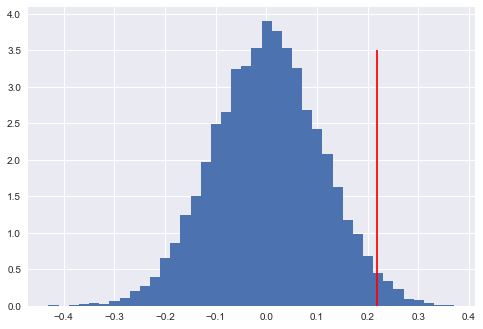

In [773]:
_ = plt.hist(diffs, bins=40, density=True)
_ = plt.vlines(real_diff, 0, 3.5, color="red")

In [774]:
p_value = np.count_nonzero(diffs > real_diff)/len(diffs)
p_value

0.021

In [775]:
regression_mechanical = linear_model.LinearRegression()
regression_electronic = linear_model.LinearRegression()

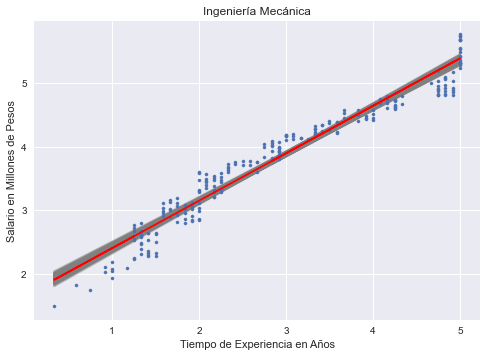

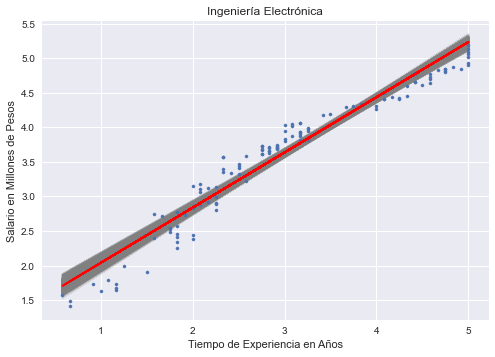

In [777]:
n_iteraciones = 1000

coef_mechanical = np.zeros(n_iteraciones)
intercept_mechanical = np.zeros(n_iteraciones)
r_squared_mechanical = np.zeros(n_iteraciones)

coef_electronic = np.zeros(n_iteraciones)
intercept_electronic = np.zeros(n_iteraciones)
r_squared_electronic = np.zeros(n_iteraciones)

plt.figure(0)
plt.figure(1)
plt.style.use("seaborn")

for i in range(n_iteraciones):
    sample_mechanical_index = np.random.choice(range(0, len(salary_mechanical)), len(salary_mechanical))
    sample_electronic_index = np.random.choice(range(0, len(salary_electronic)), len(salary_electronic))
    
    sample_salary_mechanical = salary_mechanical[sample_mechanical_index]
    sample_experience_mechanical = experience_mechanical[sample_mechanical_index]
    
    sample_salary_electronic = salary_electronic[sample_electronic_index]
    sample_experience_electronic = experience_electronic[sample_electronic_index]

    regression_mechanical.fit(sample_experience_mechanical, sample_salary_mechanical)
    regression_electronic.fit(sample_experience_electronic, sample_salary_electronic)

    coef_mechanical[i], intercept_mechanical[i], r_squared_mechanical[i] = regression_mechanical.coef_, regression_mechanical.intercept_, regression_mechanical.score(sample_experience_mechanical, sample_salary_mechanical)
    coef_electronic[i], intercept_electronic[i], r_squared_electronic[i] = regression_electronic.coef_, regression_electronic.intercept_, regression_electronic.score(sample_experience_electronic, sample_salary_electronic)
    
    plt.figure(0)
    plt.plot(experience_mechanical, regression_mechanical.predict(experience_mechanical), color="grey", alpha=0.2, zorder=1)
    
    plt.figure(1)
    plt.plot(experience_electronic, regression_electronic.predict(experience_electronic), color="grey", alpha=0.2, zorder=1)
    
plt.figure(0)
plt.scatter(experience_mechanical, salary_mechanical, marker="o", s=10, zorder=4)
plt.plot(experience_mechanical, regression_mechanical.predict(experience_mechanical), color="red", zorder=4)
plt.xlabel("Tiempo de Experiencia en Años")
plt.ylabel("Salario en Millones de Pesos")
_ = plt.title("Ingeniería Mecánica")

plt.figure(1)
plt.scatter(experience_electronic, salary_electronic, marker="o", s=10, zorder=4)
plt.plot(experience_electronic, regression_electronic.predict(experience_electronic), color="red", zorder=4)
plt.xlabel("Tiempo de Experiencia en Años")
plt.ylabel("Salario en Millones de Pesos")
_ = plt.title("Ingeniería Electrónica")

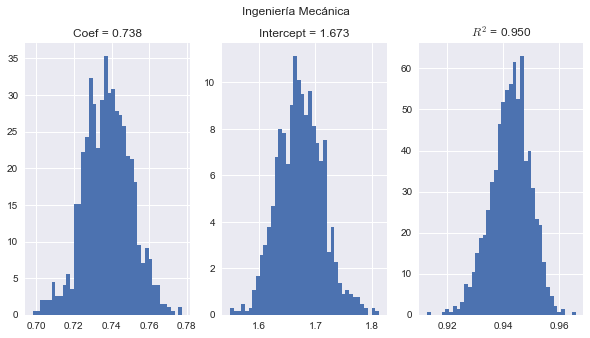

In [778]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 5))

fig.suptitle("Ingeniería Mecánica")

_ = ax[0].hist(coef_mechanical, bins = 40, density = True)
_ = ax[0].set_title("Coef = {:.3f}".format(np.mean(coef_mechanical)))
_ = ax[1].hist(intercept_mechanical, bins = 40, density = True)
_ = ax[1].set_title("Intercept = {:.3f}".format(np.mean(intercept_mechanical)))
_ = ax[2].hist(r_squared_electronic, bins= 40, density = True)
_ = ax[2].set_title(r"$R^{2}$ = " + "{:.3f}".format(np.mean(r_squared_mechanical)))

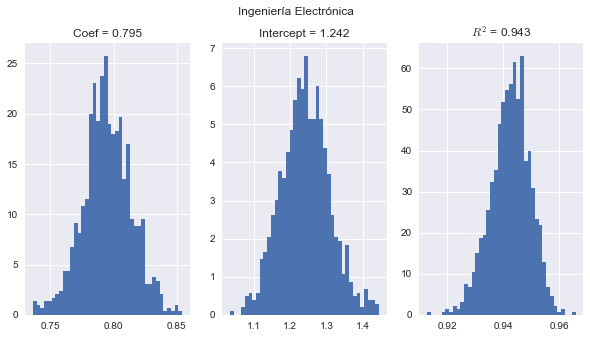

In [779]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 5))

fig.suptitle("Ingeniería Electrónica")

_ = ax[0].hist(coef_electronic, bins = 40, density = True)
_ = ax[0].set_title("Coef = {:.3f}".format(np.mean(coef_electronic)))
_ = ax[1].hist(intercept_electronic, bins = 40, density = True)
_ = ax[1].set_title("Intercept = {:.3f}".format(np.mean(intercept_electronic)))
_ = ax[2].hist(r_squared_electronic, bins= 40, density = True)
_ = ax[2].set_title(r"$R^{2}$ = " + "{:.3f}".format(np.mean(r_squared_electronic)))